In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sehriyarmemmedli/binaaz-rent-project

Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-rent-project
License(s): unknown
  0% 0.00/12.2M [00:00<?, ?B/s]
100% 12.2M/12.2M [00:00<00:00, 203MB/s]


In [ ]:
!unzip /content/binaaz-rent-project.zip

Archive:  /content/binaaz-rent-project.zip
  inflating: house_rent.csv          


In [ ]:
df = pd.read_csv('/content/house_rent.csv')

<ipython-input-5-74497079e0d2>:1: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/house_rent.csv')


In [ ]:
df.drop(['id_x', 'id_y', 'rel_url', 'updated', 'estate_rel_url_x', 'estate_rel_url_y',
         'estate_details_id_x', 'datetime_scrape_x','estate_details_id_y', 'estate_rel_url',
         'city_when', 'estate_details_id_x', 'extra_info','vip', 'owner_name', 'owner_title',
         'day_x', 'estate_id', 'total_price', 'hour_x', 'description', 'img_url', 'datetime_scrape_y',
         'views', 'day_y', 'hour_y', 'repair', 'attributes', 'currency_x', 'featured', 'currency_y', 'shop_title', 'billing_cycle_y'], axis = 1, inplace = True)

In [ ]:
df

,price,billing_cycle_x,location,city,products_label,shop_name,address,lat,lng,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir
0,219.0,297,46,2,1,253,7062,40.397227,49.859505,3,6,297,3,198 m²,NaN,0
1,700.0,108,11,2,1,253,1669,40.400899,49.824871,3,6,108,1,90 m²,NaN,0
2,1500.0,270,71,2,0,143,2105,40.375725,49.835608,3,6,270,3,170 m²,NaN,0
3,1500.0,94,27,2,1,253,5713,40.351695,49.832118,3,6,94,1,80 m²,NaN,0
4,1000.0,321,77,2,0,154,2962,40.376612,49.860013,3,6,321,1,70 m²,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33890,800.0,123,77,2,0,187,5300,40.395888,49.833870,3,6,123,3,200 m²,NaN,0
33891,1500.0,378,88,2,0,47,1434,40.373502,49.843840,3,6,378,1,110 m²,NaN,0
33892,1400.0,79,4,2,1,253,1637,40.388060,49.847348,3,6,79,4,200 m²,NaN,0
33893,2500.0,418,124,2,0,73,5040,40.389966,49.953914,3,2,418,2,120 m²,NaN,0


In [ ]:
df.dtypes

,0
price,float64
billing_cycle_x,int64
location,int64
city,int64
products_label,int64
shop_name,int64
address,int64
lat,float64
lng,float64
Binanın növü,int64


In [ ]:
df.isna().sum()

,0
price,0
billing_cycle_x,0
location,0
city,0
products_label,0
shop_name,0
address,0
lat,0
lng,0
Binanın növü,0


In [ ]:
# Sahə sütununda 'm²' sözünü təmizləyirik
df['Sahə'] = df['Sahə'].str.replace(r'm²', '', regex=True)
df['Sahə'] = df['Sahə'].str.replace(' ', '', regex=True) # Remove spaces
df['Sahə'] = pd.to_numeric(df['Sahə'], errors='coerce')

In [ ]:
# Torpaq sahəsi sütununda 'sot' sözünü təmizləyirik
df['Torpaq sahəsi'] = df['Torpaq sahəsi'].str.replace(r' sot', '', regex=True)
df['Torpaq sahəsi'] = df['Torpaq sahəsi'].str.replace(' ', '', regex=True) # Remove spaces
df['Torpaq sahəsi'] = pd.to_numeric(df['Torpaq sahəsi'], errors='coerce')

In [ ]:
df['Təmir'] = df['Təmir'].fillna(df['Təmir'].mode()[0])

In [ ]:
df['Sahə'] = df['Sahə'].fillna(df['Sahə'].mean())

In [ ]:
df['Otaq sayı'] = df['Otaq sayı'].fillna(df['Otaq sayı'].mean())

In [ ]:
df['Torpaq sahəsi'] = df['Torpaq sahəsi'].fillna(df['Torpaq sahəsi'].mean())

In [ ]:
# LabelEncoder instansiyasını yaradıb bezi sütunlari kodlaşdırırıq
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Təmir'] = encoder.fit_transform(df['Təmir'])
df['Kateqoriya'] = encoder.fit_transform(df['Kateqoriya'])
df['Mərtəbə'] = encoder.fit_transform(df['Mərtəbə'])
df['billing_cycle_x'] = encoder.fit_transform(df['Mərtəbə'])
df['products_label'] = encoder.fit_transform(df['products_label'])
df['Binanın növü'] = encoder.fit_transform(df['Binanın növü'])
df['Otaq sayı'] = encoder.fit_transform(df['Otaq sayı'])
df['address'] = encoder.fit_transform(df['address'])
df['location'] = encoder.fit_transform(df['location'])
df['city'] = encoder.fit_transform(df['city'])
df['shop_name'] = encoder.fit_transform(df['shop_name'])

In [ ]:
# Kənar nöqtələri yoxlamaq üçün Z-skoru istifadə edə bilərik
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))  # Yalnız ədədi sütunları götür

df_no_outliers = df[(abs(z_scores) < 3).all(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers.select_dtypes(include=[float, int]))  # Yalnız ədədi sütunlarla işləyirik

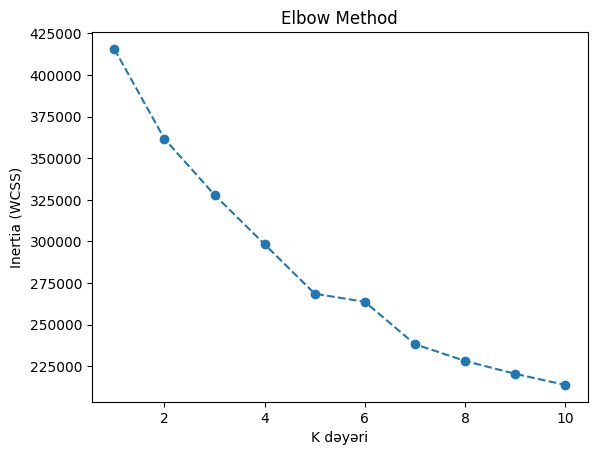

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
K_values = range(1, 11)  # 1-dən 10-a qədər olan K dəyərləri üçün

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Elbow metodunu qrafikləşdiririk
plt.plot(K_values, inertia_values, marker='o', linestyle='--')
plt.xlabel("K dəyəri")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

In [ ]:
# Optimal K-ni 4 tapdıq
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Klasterləri datasetə əlavə edək
df_no_outliers['Cluster'] = clusters

# İlk 5 sətiri yenidən yoxlayaq
print(df_no_outliers.head())

    price  billing_cycle_x  location  city  products_label  shop_name  \
0   219.0              297        46     2               1        253   
1   700.0              108        11     2               1        253   
2  1500.0              270        71     2               0        143   
3  1500.0               94        27     2               1        253   
4  1000.0              321        77     2               0        154   

   address        lat        lng  Binanın növü  Kateqoriya  Mərtəbə  \
0     7062  40.397227  49.859505             3           6      297   
1     1669  40.400899  49.824871             3           6      108   
2     2105  40.375725  49.835608             3           6      270   
3     5713  40.351695  49.832118             3           6       94   
4     2962  40.376612  49.860013             3           6      321   

   Otaq sayı   Sahə  Torpaq sahəsi  Təmir  Cluster  
0          3  198.0      21.857527      0        2  
1          1   90.0      21.

<ipython-input-53-14353a833520>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = clusters


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.14451556056679782


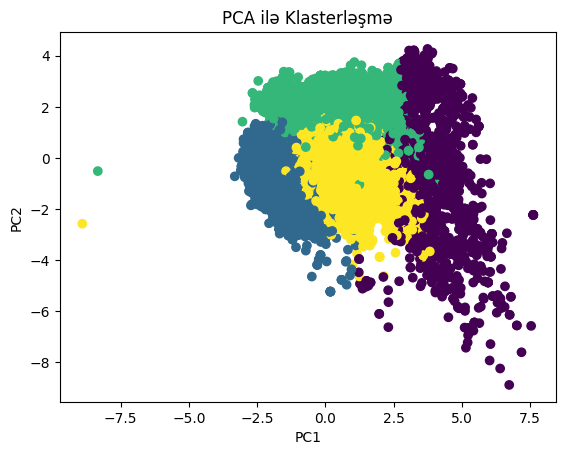

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA ilə Klasterləşmə")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_scaled)

# Klasterləri datasetə əlavə et
df_no_outliers.loc[:, 'DBSCAN Cluster'] = dbscan_clusters

# İlk 5 sətiri yenidən yoxlayaq
print(df_no_outliers.head())

    price  billing_cycle_x  location  city  products_label  shop_name  \
0   219.0              297        46     2               1        253   
1   700.0              108        11     2               1        253   
2  1500.0              270        71     2               0        143   
3  1500.0               94        27     2               1        253   
4  1000.0              321        77     2               0        154   

   address        lat        lng  Binanın növü  Kateqoriya  Mərtəbə  \
0     7062  40.397227  49.859505             3           6      297   
1     1669  40.400899  49.824871             3           6      108   
2     2105  40.375725  49.835608             3           6      270   
3     5713  40.351695  49.832118             3           6       94   
4     2962  40.376612  49.860013             3           6      321   

   Otaq sayı   Sahə  Torpaq sahəsi  Təmir  Cluster  DBSCAN Cluster  
0          3  198.0      21.857527      0        2              -